We will use two packages: FactoMineR  and factoextra . FactoMineR is used for the analysis and use factoextra for ggplot2-based visualization.

In [42]:
library(FactoMineR)
library(ggplot2)
library(factoextra)

We’ll use the demo data sets decathlon from the factoextra package.

In [43]:
data(decathlon)
head(decathlon)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


We start by subsetting active individuals and active variables for the principal component analysis.

In [44]:
decathlon.active = decathlon[1:23, 1:10]
head(decathlon.active)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1


The R code below, computes principal component analysis on the active individuals/variables. The PCA function also does the standardisation of the data automatically.

In [45]:
res.pca = PCA(decathlon.active, graph = FALSE)
res.pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

The eigenvalues measure the amount of variation retained by each principal component. Eigenvalues are large for the first PCs and small for the subsequent PCs. That is, the first PCs corresponds to the directions with the maximum amount of variation in the data set.

We examine the eigenvalues to determine the number of principal components to be considered. The eigenvalues and the proportion of variances (i.e., information) retained by the principal components (PCs) can be extracted using the function get_eigenvalue().

In [46]:
eig.val = get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.08738041,40.8738041,40.87380
Dim.2,1.75595634,17.5595634,58.43337
Dim.3,1.39633467,13.9633467,72.39671
Dim.4,1.01792222,10.1792222,82.57594
Dim.5,0.66323812,6.6323812,89.20832
Dim.6,0.36573145,3.6573145,92.86563
Dim.7,0.27488283,2.7488283,95.61446
Dim.8,0.20025351,2.0025351,97.61700
Dim.9,0.16657033,1.6657033,99.28270
Dim.10,0.07173011,0.7173011,100.00000


The scree plot tells us that which dimension is more important. Generally, variables with eigenvalues > 1 are considered important.

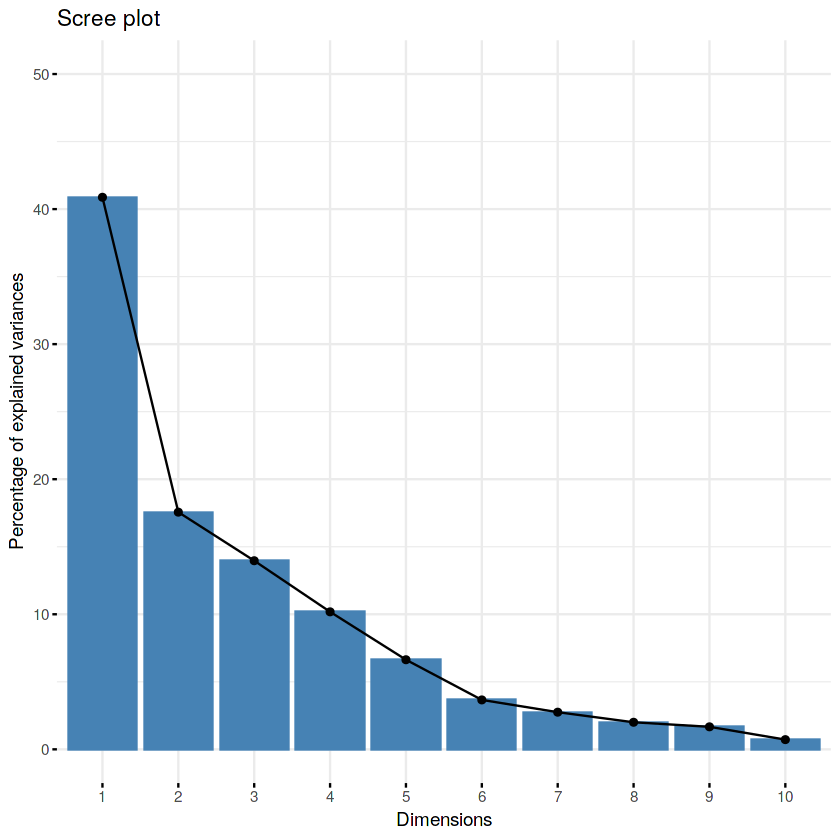

In [47]:
fviz_eig(res.pca, addLabels = TRUE, ylim = c(0,50))

A simple method to extract the results, for variables, from a PCA output is to use the function get_pca_var(). This function provides a list of matrices containing all the results for the active variables (coordinates, correlation between variables and axes, squared cosine and contributions)

In [48]:
var = get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

var$coord: coordinates of variables to create a scatter plot

In [49]:
#Co-ordinates
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,-0.8407247,-0.23117779,0.15739397,0.13486416,0.25542593
Long.jump,0.7758356,0.33463965,-0.08251015,-0.23200885,-0.22818830
Shot.put,0.7506706,-0.03298435,0.46596447,0.13077071,0.34531769
High.jump,0.6227359,-0.59155594,0.29839999,0.01237103,-0.20325998
400m,-0.7190524,0.04181499,0.44058827,0.31957090,-0.23955776
110m.hurdle,-0.7827992,-0.04542627,0.49550450,-0.06911292,-0.04962621


var$cos2: represents the quality of representation for variables on the factor map. It’s calculated as the squared coordinates: var.cos2 = var.coord * var.coord.

In [50]:
#Cos2 : quality on the factor map
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,0.7068180,0.053443169,0.024772861,0.0181883420,0.065242406
Long.jump,0.6019209,0.111983695,0.006807924,0.0538281084,0.052069901
Shot.put,0.5635064,0.001087967,0.217122891,0.0171009795,0.119244306
High.jump,0.3878000,0.349938433,0.089042552,0.0001530423,0.041314619
400m,0.5170364,0.001748494,0.194118020,0.1021255591,0.057387919
110m.hurdle,0.6127746,0.002063546,0.245524709,0.0047765951,0.002462761


var$contrib: contains the contributions (in percentage) of the variables to the principal components. The contribution of a variable (var) to a given principal component is (in percentage) : (var.cos2 * 100) / (total cos2 of the component).

In [51]:
#Contributions to the principle components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,17.292690,3.04353631,1.7741349,1.78681059,9.8369505
Long.jump,14.726325,6.37736214,0.4875568,5.28803748,7.8508607
Shot.put,13.786492,0.06195868,15.5494879,1.67998883,17.9791091
High.jump,9.487738,19.92865232,6.3768775,0.01503477,6.2292287
400m,12.649579,0.09957502,13.9019695,10.03274683,8.6526871
110m.hurdle,14.991866,0.11751695,17.5835144,0.46924952,0.3713237


The correlation between a variable and a principal component (PC) is used as the coordinates of the variable on the PC. The representation of variables differs from the plot of the observations: The observations are represented by their projections, but the variables are represented by their correlations.

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,-0.8407247,-0.23117779,0.15739397,0.13486416,0.2554259
Long.jump,0.7758356,0.33463965,-0.08251015,-0.23200885,-0.2281883
Shot.put,0.7506706,-0.03298435,0.46596447,0.13077071,0.3453177
High.jump,0.6227359,-0.59155594,0.29839999,0.01237103,-0.2032600


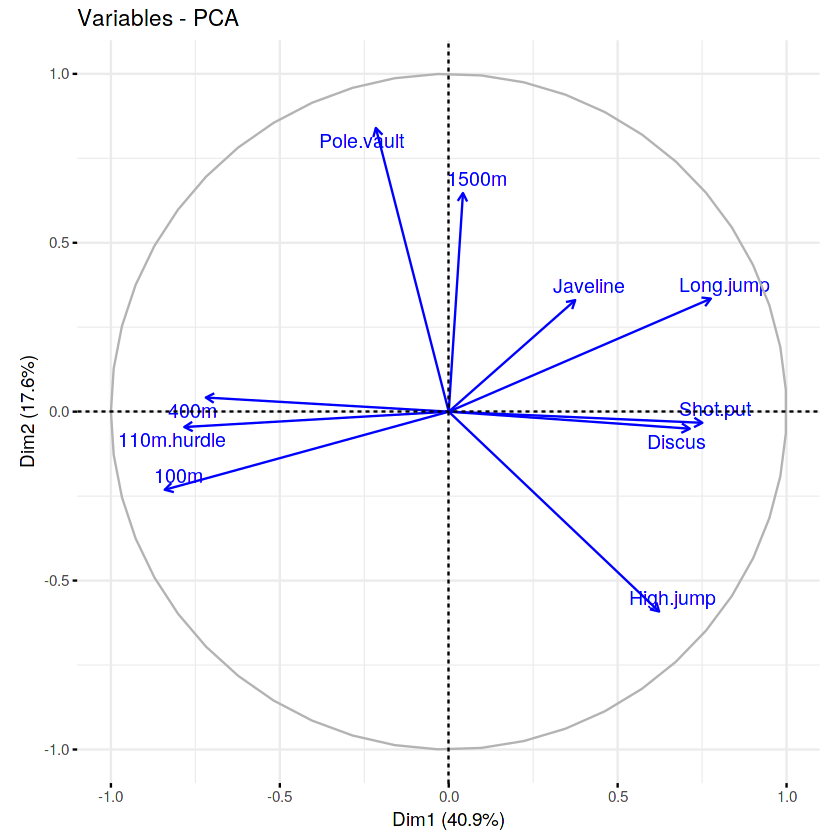

In [52]:
#Correlation circle
head(var$coord,4)
fviz_pca_var(res.pca, col.var = 'blue', repel = TRUE)

The cos2 of variables on all the dimensions can be visualised using the corrplot package. Also, a bar plot of variables cos2 can be created using the function fviz_cos2()

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,0.7068180,0.053443169,0.024772861,0.0181883420,0.06524241
Long.jump,0.6019209,0.111983695,0.006807924,0.0538281084,0.05206990
Shot.put,0.5635064,0.001087967,0.217122891,0.0171009795,0.11924431
High.jump,0.3878000,0.349938433,0.089042552,0.0001530423,0.04131462


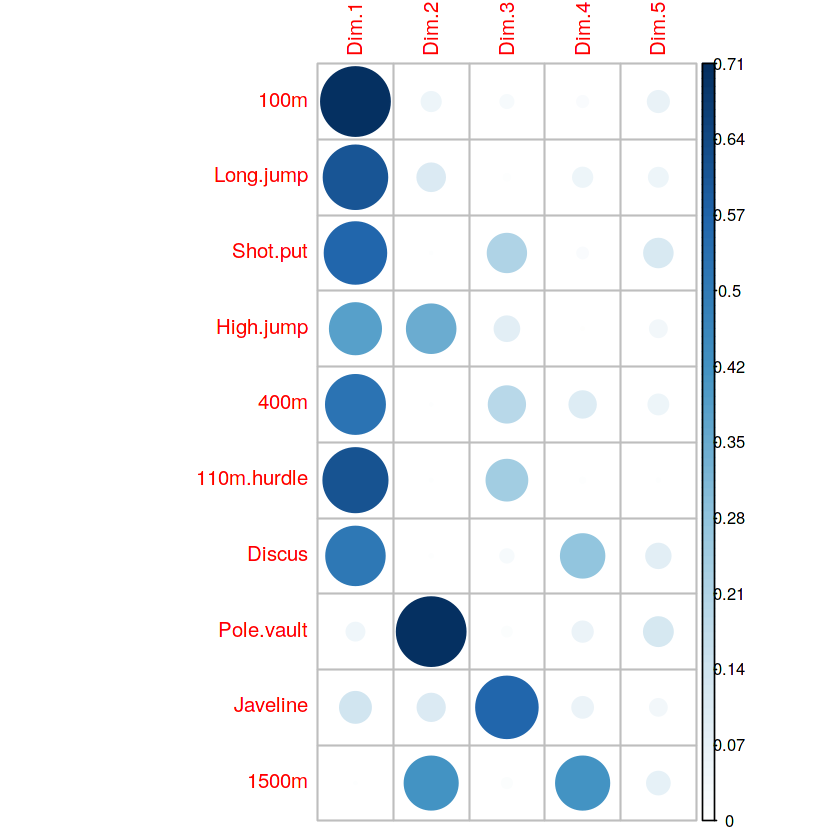

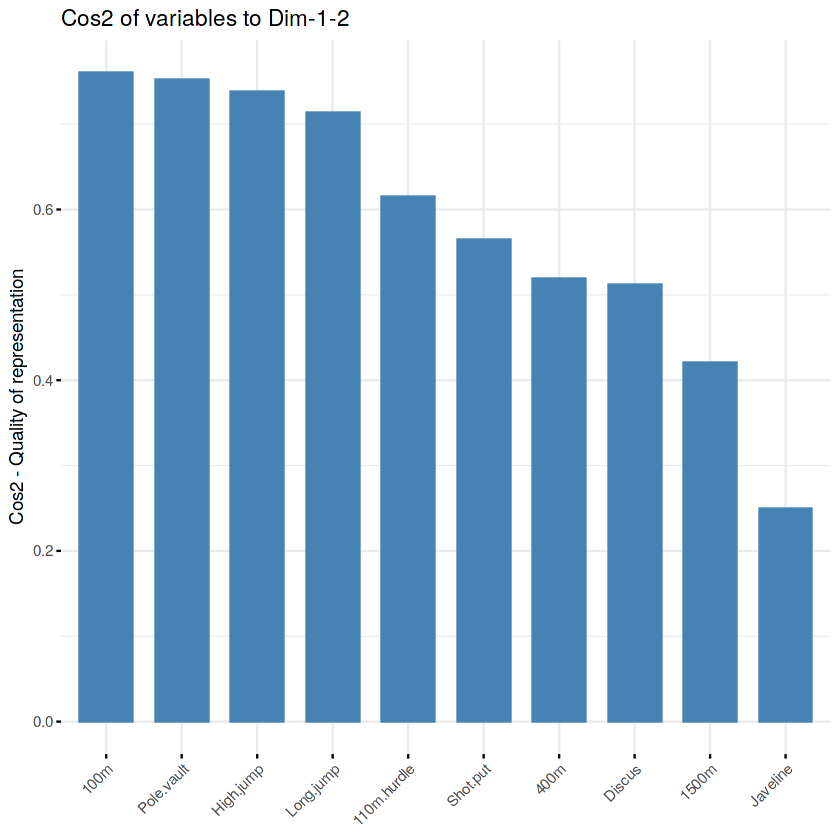

In [53]:
#Quality of representation
head(var$cos2,4)
library('corrplot')
corrplot(var$cos2, is.corr = FALSE)
fviz_cos2(res.pca, choice = 'var', axes = 1:2)

Transparency of the variables according to their cos2 values can be changed.

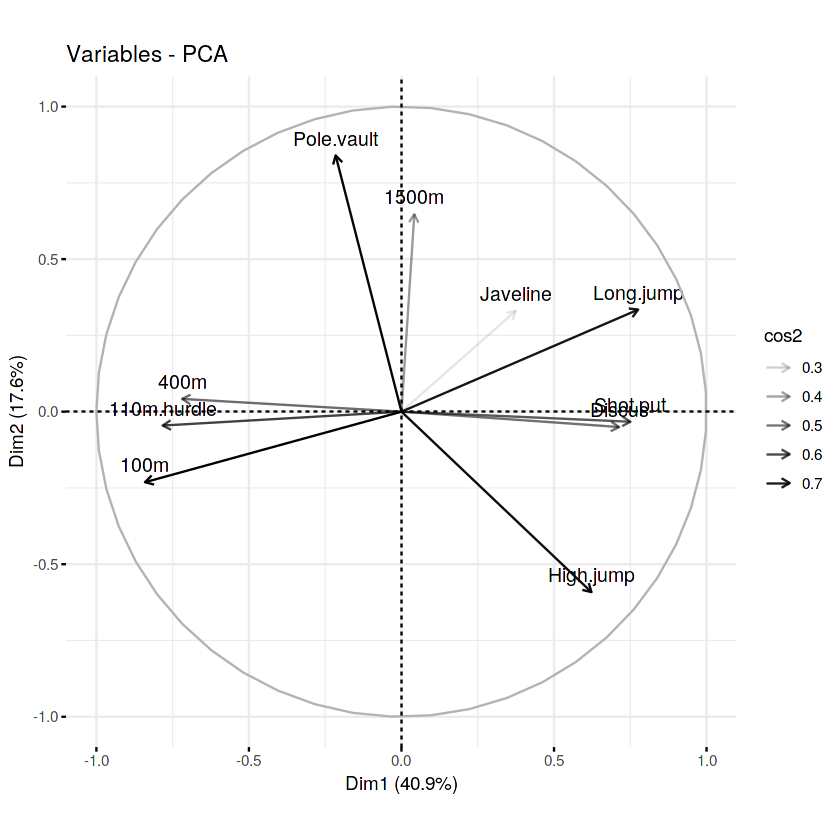

In [54]:
#Change the transparency
fviz_pca_var(res.pca, alpha.var = 'cos2')

The contribution of the variables can be extracted as follows:

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
100m,17.292690,3.04353631,1.7741349,1.78681059,9.836950
Long.jump,14.726325,6.37736214,0.4875568,5.28803748,7.850861
Shot.put,13.786492,0.06195868,15.5494879,1.67998883,17.979109
High.jump,9.487738,19.92865232,6.3768775,0.01503477,6.229229


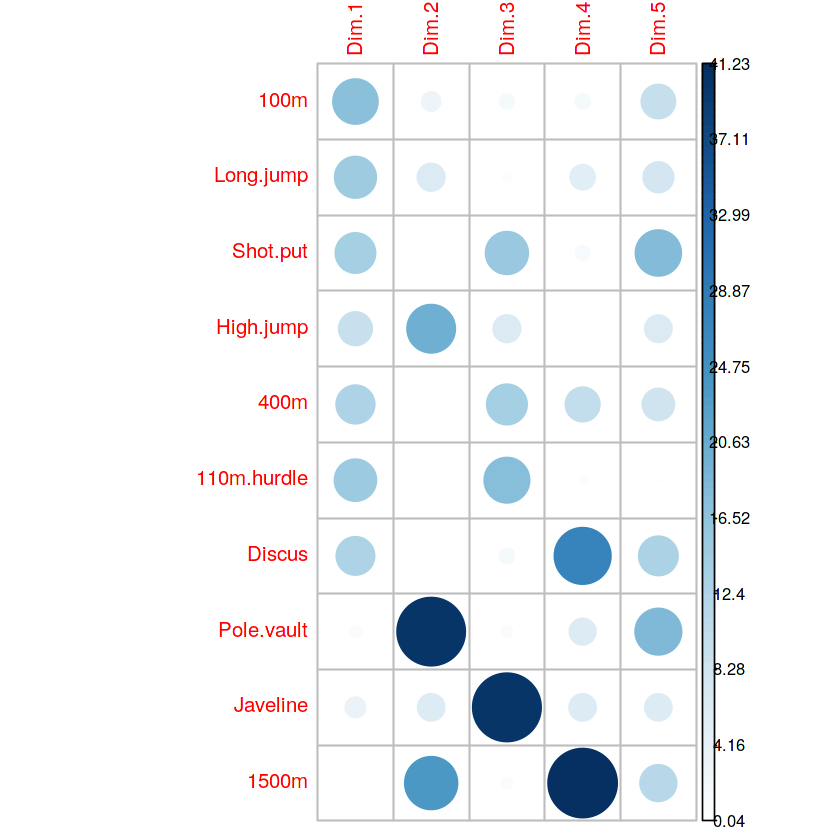

In [55]:
#Contibution of of variables to princcple components
head(var$contrib,4)
corrplot(var$contrib, is.corr = FALSE)

A bar plot which demonstrates the contribution of each variable to the first principle component.

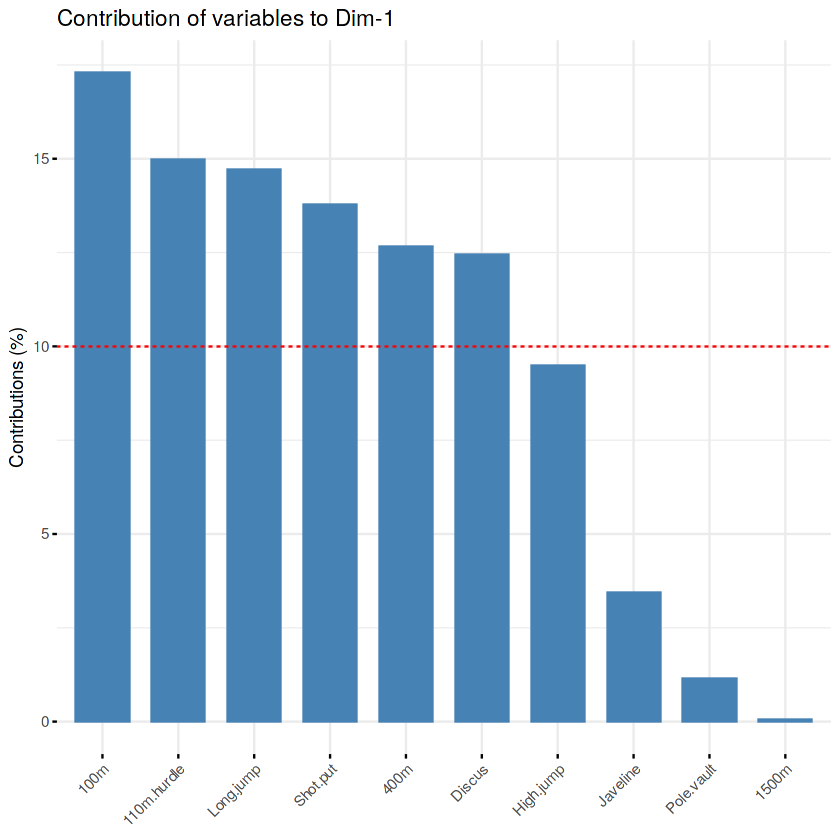

In [56]:
#Contribution of variable to PC1
fviz_contrib(res.pca, choice = 'var', axes = 1, top = 10)

A bar plot which demonstrates the contribution of each variable to the second principle component.

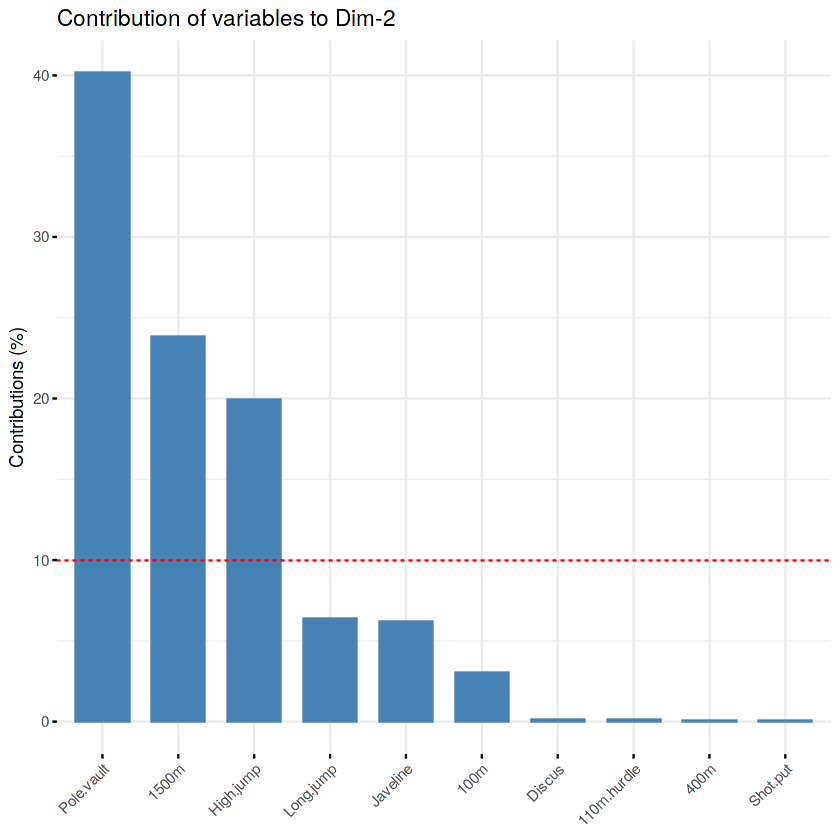

In [57]:
#Contribution of variable to PC2
fviz_contrib(res.pca, choice = 'var', axes = 2, top = 10)

A bar plot which demonstrates the contribution of each variable to the first two principle components.

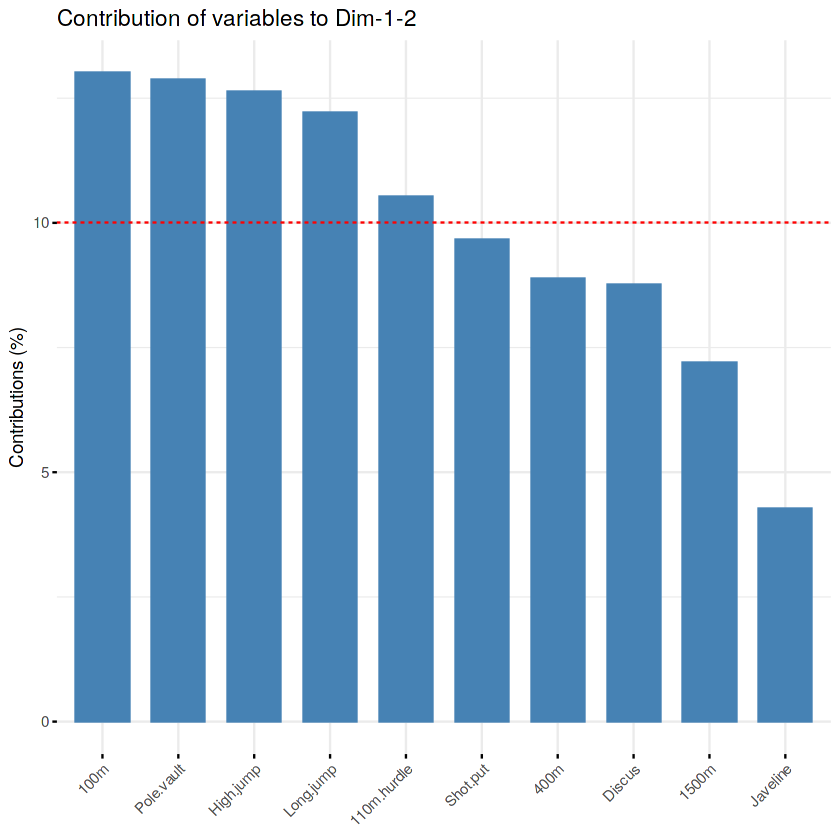

In [58]:
#Contribution to PC1 and PC2
fviz_contrib(res.pca, choice = 'var', axes = 1:2, top = 10)

he most important (or, contributing) variables can be highlighted on the correlation plot as :

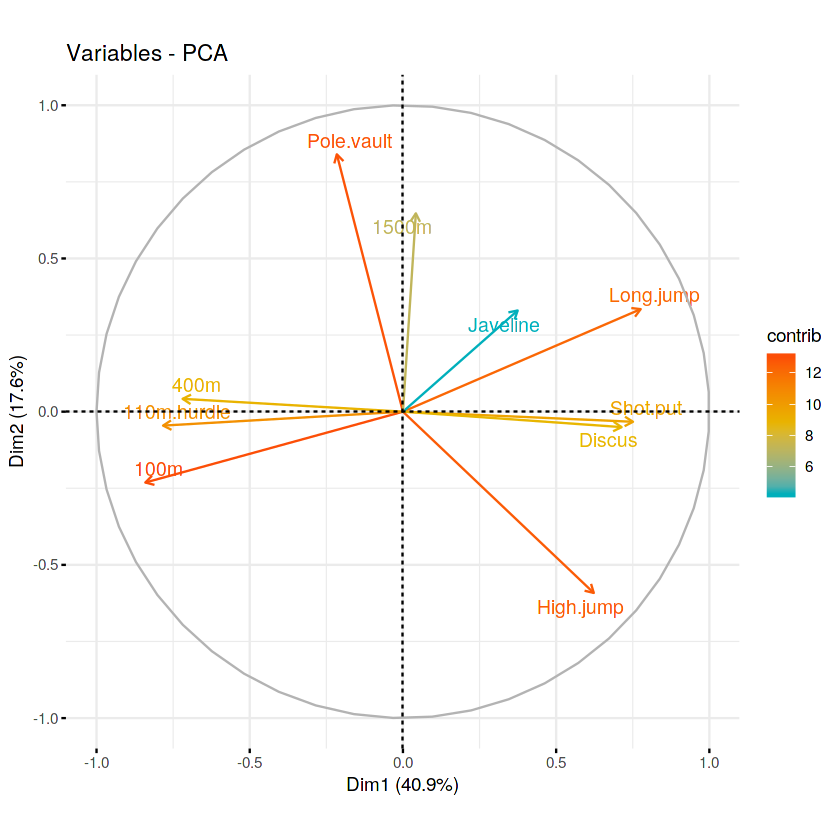

In [59]:
fviz_pca_var(res.pca, col.var = 'contrib',
            gradient.cols = c('#00AFBB', '#E7B800', '#FC4E07'),
            repel = TRUE)

We can colour the variables by any custom continuous variable. But the coloring variable should have the same length as the number of active variables in the PCA (here n = 10).

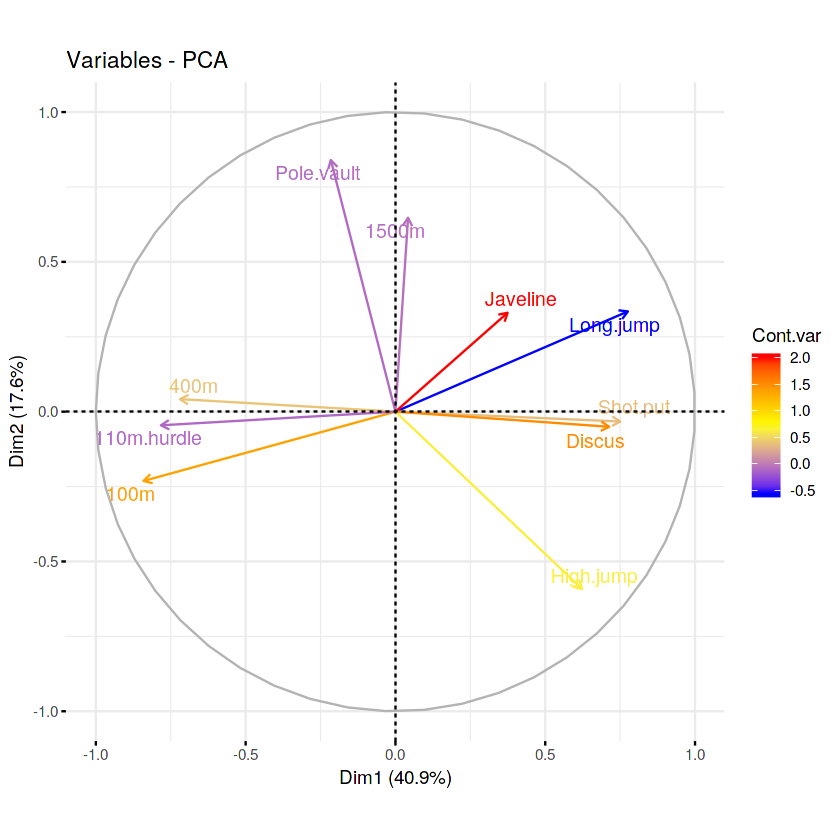

In [60]:
#Colour by a custom continuous variable
set.seed(42)
my.cont.var = rnorm(10)
fviz_pca_var(res.pca, col.var = my.cont.var,
            gradient.cols = c("blue","yellow","red"),
            legend.title = "Cont.var",
            repel = TRUE)

We can also change the color of variables by groups defined by a qualitative/categorical variable. Since our dataset doesn't contain groups, we will cluster the dataset using k-means algorithm.

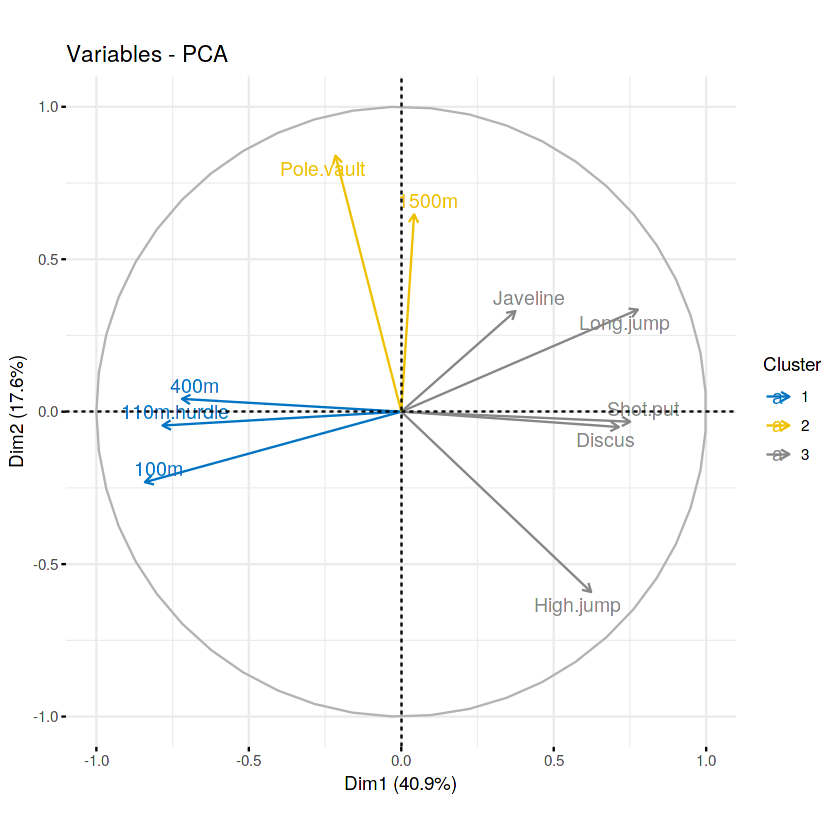

In [61]:
#Colour by groups(Clustering)
set.seed(42)
res.km = kmeans(var$coord, centers =3, nstart = 25)
grp = as.factor(res.km$cluster)
fviz_pca_var(res.pca, col.var = grp,
            palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
            legend.title = "Cluster",
            repel = TRUE)

Dimension description can be used to identify the most significantly associated variables with a given principal component.

In [62]:
#Dimension Decription
res.desc = dimdesc(res.pca, axes = c(1,2), proba = 0.05)
#description of dimension 1
res.desc$Dim.1
#description of dimension 2
res.desc$Dim.2

,correlation,p.value
Long.jump,0.7758356,1.360853e-05
Shot.put,0.7506706,3.684147e-05
Discus,0.7134916,1.322052e-04
High.jump,0.6227359,1.505192e-03
400m,-0.7190524,1.106015e-04
110m.hurdle,-0.7827992,1.010108e-05
100m,-0.8407247,5.109935e-07


,correlation,p.value
Pole.vault,0.8398323,5.396226e-07
1500m,0.6471657,8.444590e-04
High.jump,-0.5915559,2.947911e-03


The results, for individuals can be extracted using the function get_pca_ind()

In [63]:
#Graph of individuals
ind = get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [64]:
#Coordinates of individuals
head(ind$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.1649829,1.163228,1.1129648,0.2828638,-0.82955143
CLAY,0.7077328,2.229468,-0.7867810,2.0081419,-0.08603738
KARPOV,0.8427816,0.556057,-1.5556178,2.1035176,0.70637657
BERNARD,-1.3707908,1.746770,0.4814376,-1.3078206,0.39412249
YURKOV,-0.9922785,-1.052610,2.5623438,0.6566635,0.04224769
WARNERS,-0.3179072,0.171454,-1.6268749,-0.6934862,0.16861764


In [65]:
#Quality if the individuals
head(ind$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.005980118,0.297277165,0.27214145,0.01757869,0.1511883926
CLAY,0.041795219,0.414753765,0.05165302,0.33649359,0.0006176782
KARPOV,0.070147001,0.030536389,0.23899277,0.43698979,0.0492778255
BERNARD,0.236977814,0.384801653,0.02923111,0.21570574,0.0195897002
YURKOV,0.106550875,0.119901548,0.71050103,0.04666332,0.0001931505
WARNERS,0.021357578,0.006212216,0.55931900,0.10163117,0.0060083779


In [66]:
#Contribution of the individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.02895376,3.35033466,3.8569634,0.3417529,4.51117131
CLAY,0.53280185,12.30724392,1.9274822,17.2244903,0.04852628
KARPOV,0.75553961,0.76559159,7.5350898,18.8994815,3.27096011
BERNARD,1.99880048,7.55492282,0.7217098,7.3055670,1.01827510
YURKOV,1.04735577,2.74342662,20.4436039,1.8418036,0.01170061
WARNERS,0.10750480,0.07278699,8.2412100,2.0541552,0.18638403


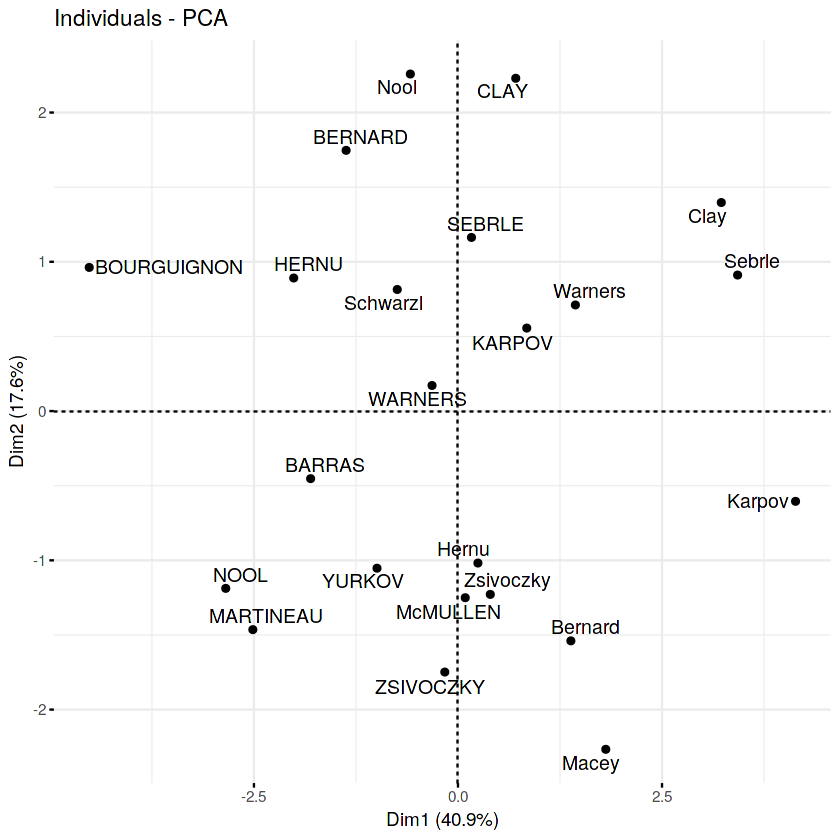

In [67]:
#A Simple Plot
fviz_pca_ind(res.pca, repel = TRUE)

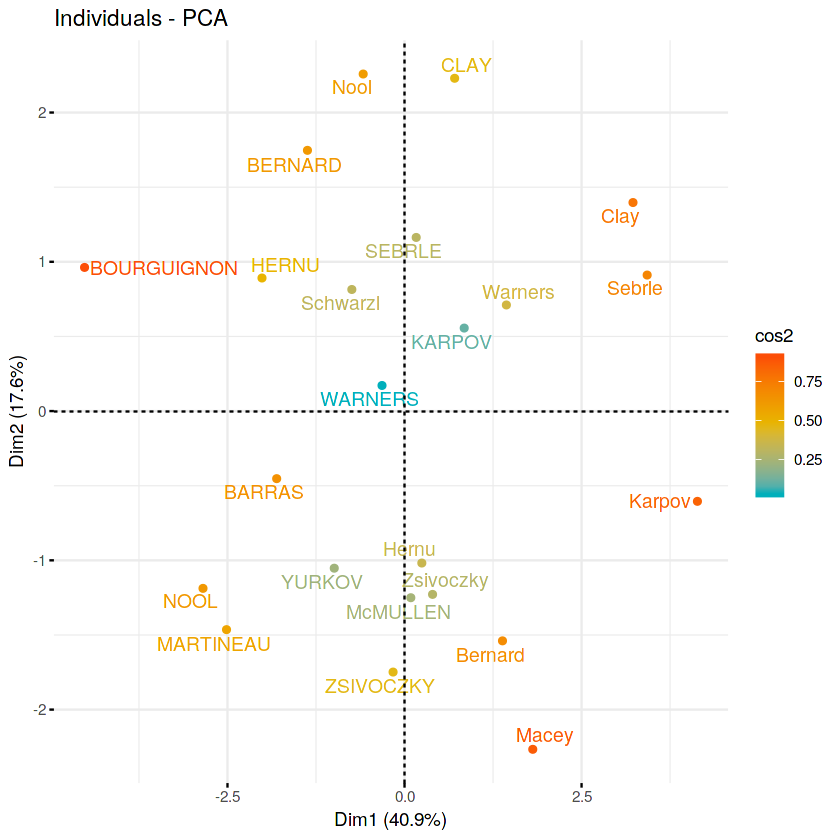

In [68]:
#coloured plot
fviz_pca_ind(res.pca, col.ind = "cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel = TRUE)

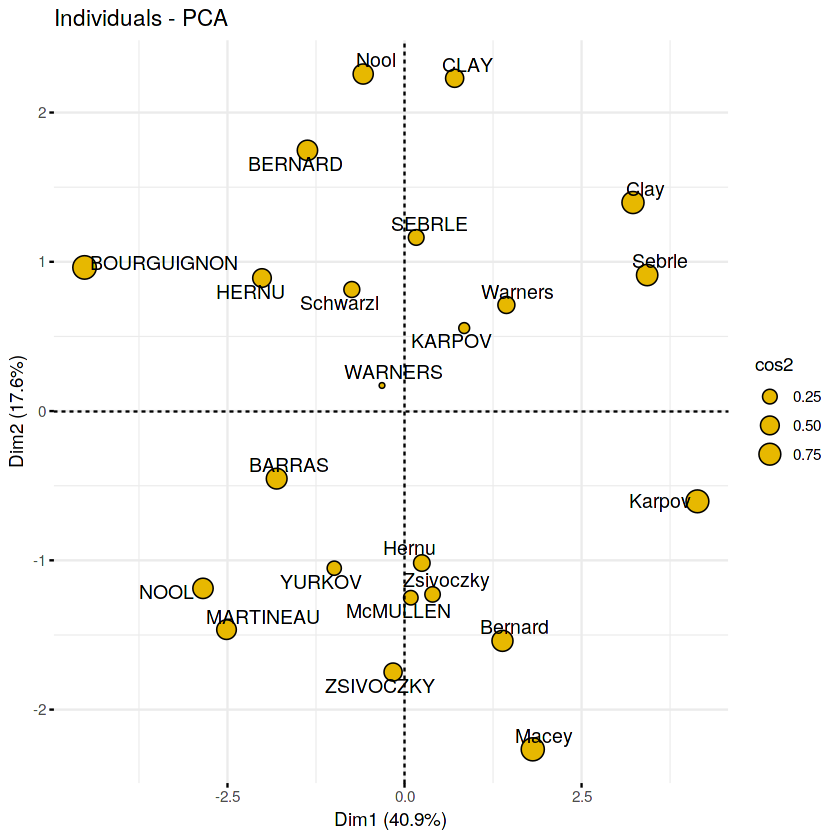

In [69]:
#Change the point size
fviz_pca_ind(res.pca, pointsize = "cos2",
            pointshape = 21, fill = "#E7B800",
            repel = TRUE)

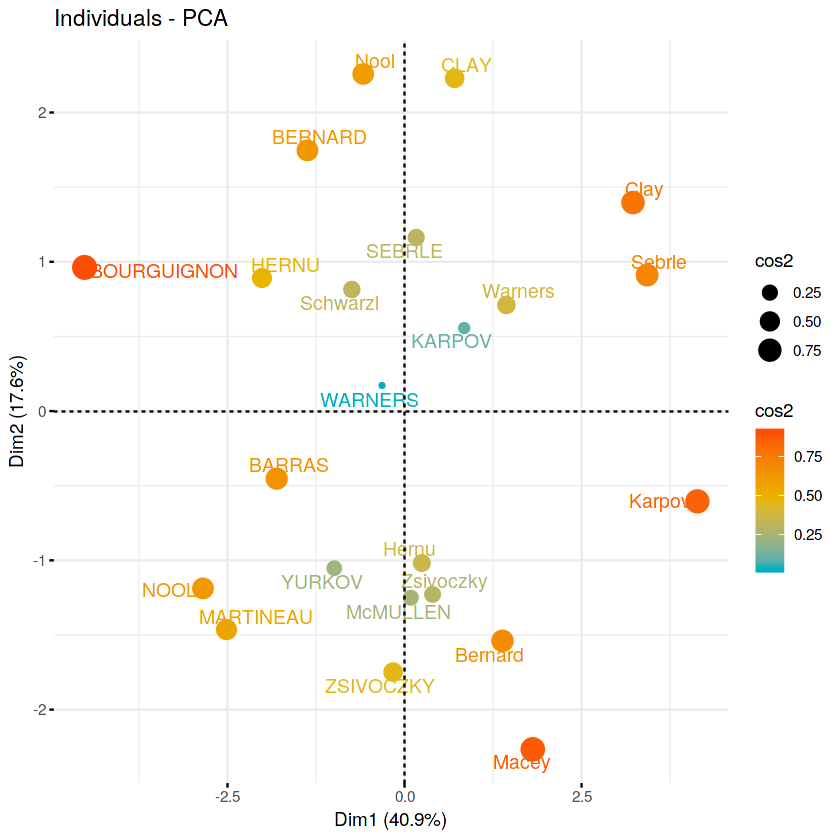

In [70]:
#Change both point size and colour
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE
             )

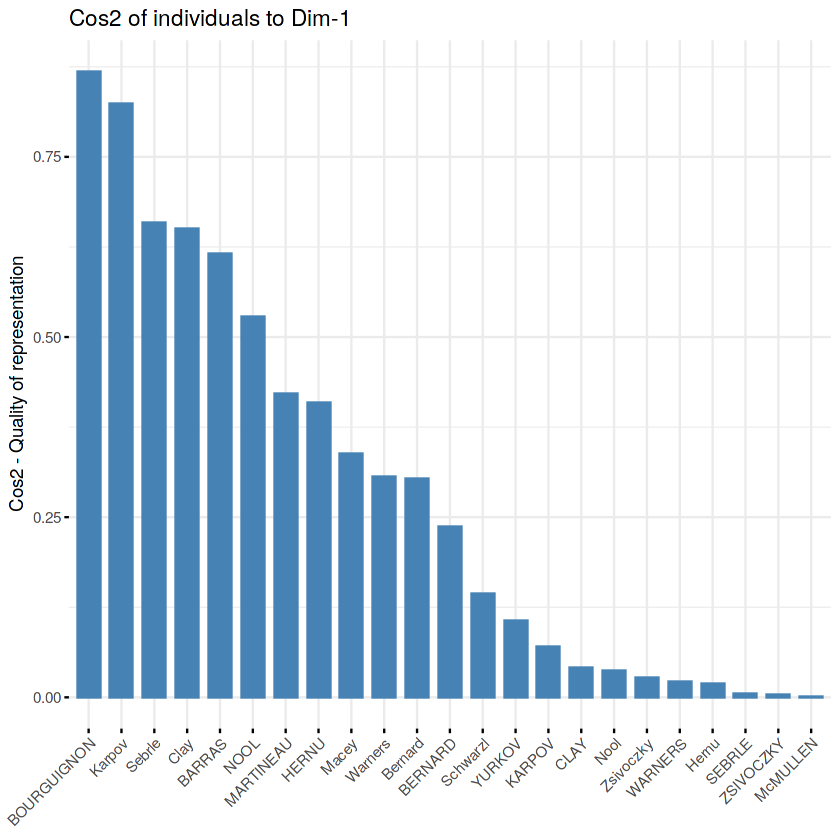

In [71]:
#Bar plot
fviz_cos2(res.pca, choice = "ind")

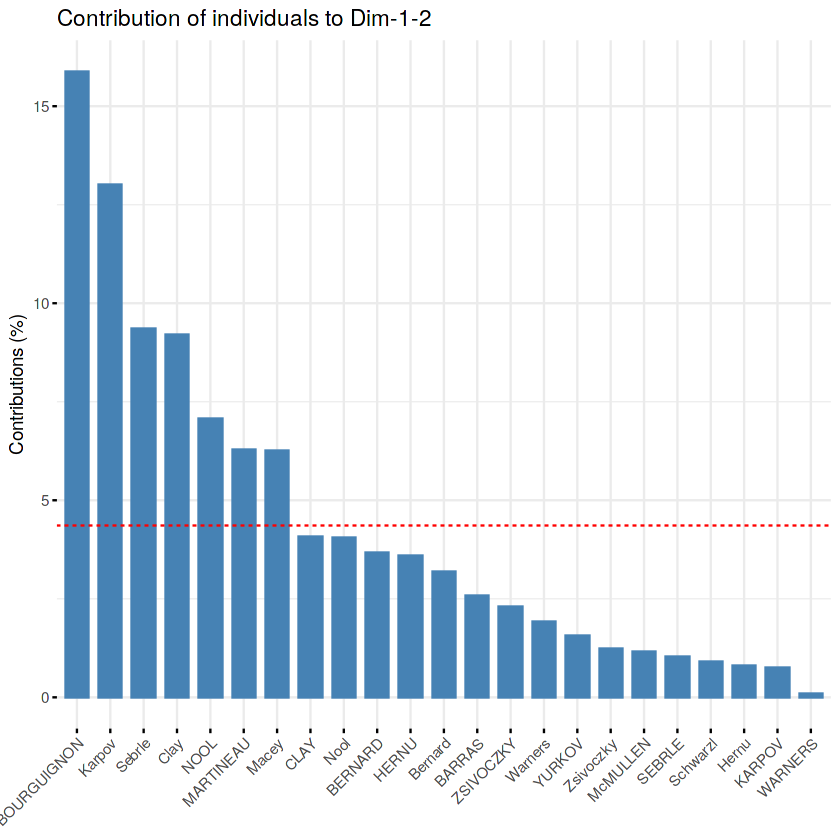

In [72]:
#Total contribution to Dim 1 and Dim 2
fviz_contrib(res.pca, choice = 'ind', axes = 1:2)

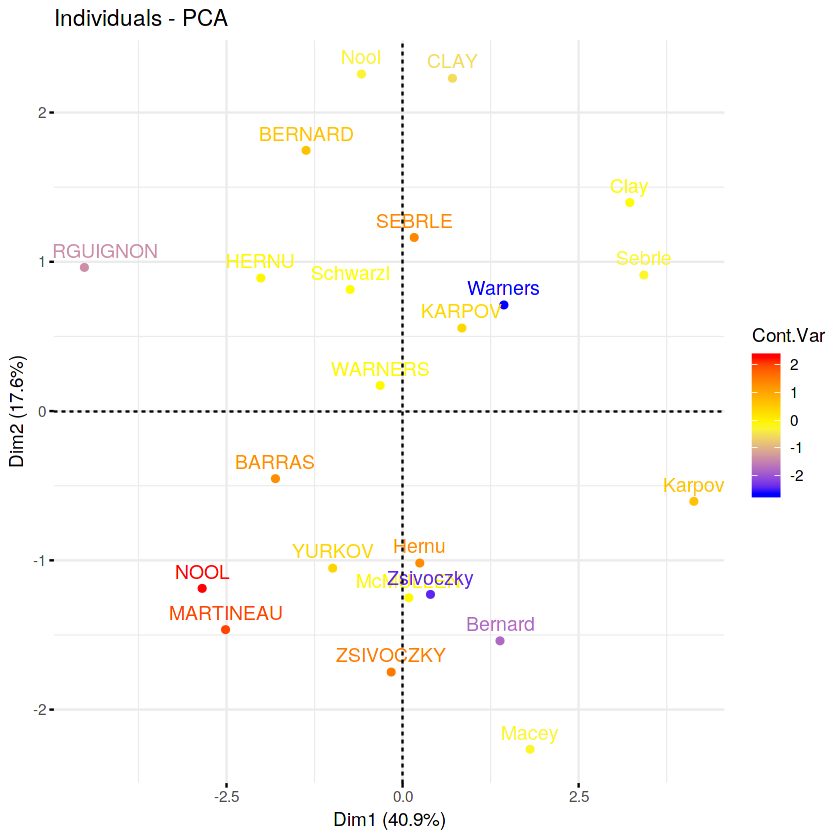

In [73]:
#Colour by a custom continuous variable
set.seed(42)
my.rand.var = rnorm(23)
fviz_pca_ind(res.pca, col.ind = my.rand.var,
            gradient.cols = c("blue", "yellow", "red"),
            legend.title = "Cont.Var",
            Repel = TRUE)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 41 individuals, described by 13 variables
*The results are available in the following objects:

   name               
1  "$eig"             
2  "$var"             
3  "$var$coord"       
4  "$var$cor"         
5  "$var$cos2"        
6  "$var$contrib"     
7  "$ind"             
8  "$ind$coord"       
9  "$ind$cos2"        
10 "$ind$contrib"     
11 "$ind.sup"         
12 "$ind.sup$coord"   
13 "$ind.sup$cos2"    
14 "$quanti.sup"      
15 "$quanti.sup$coord"
16 "$quanti.sup$cor"  
17 "$quali.sup"       
18 "$quali.sup$coord" 
19 "$quali.sup$v.test"
20 "$call"            
21 "$call$centre"     
22 "$call$ecart.type" 
23 "$call$row.w"      
24 "$call$col.w"      
   description                                              
1  "eigenvalues"                                            
2  "results for the variables"                              
3  "coord. for the variables"                               


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.6826272,0.020389892,-0.03868069,-0.1513711,-0.3183014
Points,0.9614565,0.009757883,-0.06918242,0.2240218,0.1079926
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.6826272,0.020389892,-0.03868069,-0.1513711,-0.3183014
Points,0.9614565,0.009757883,-0.06918242,0.2240218,0.1079926
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,0.4659800,4.157477e-04,0.001496196,0.02291322,0.10131580
Points,0.9243986,9.521629e-05,0.004786207,0.05018577,0.01166239


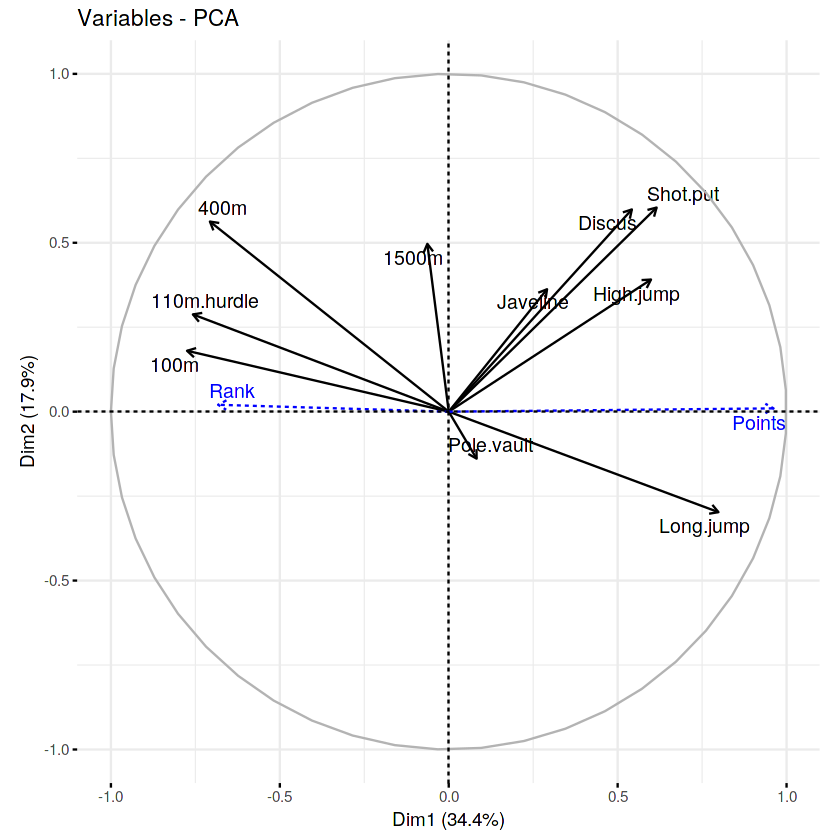

In [74]:
#Supplementary elements
res.pca = PCA(decathlon, ind.sup = 24:27,
             quanti.sup = 11:12, quali.sup = 13, graph = FALSE)
res.pca
res.pca$quanti.sup
fviz_pca_var(res.pca, repel = TRUE)

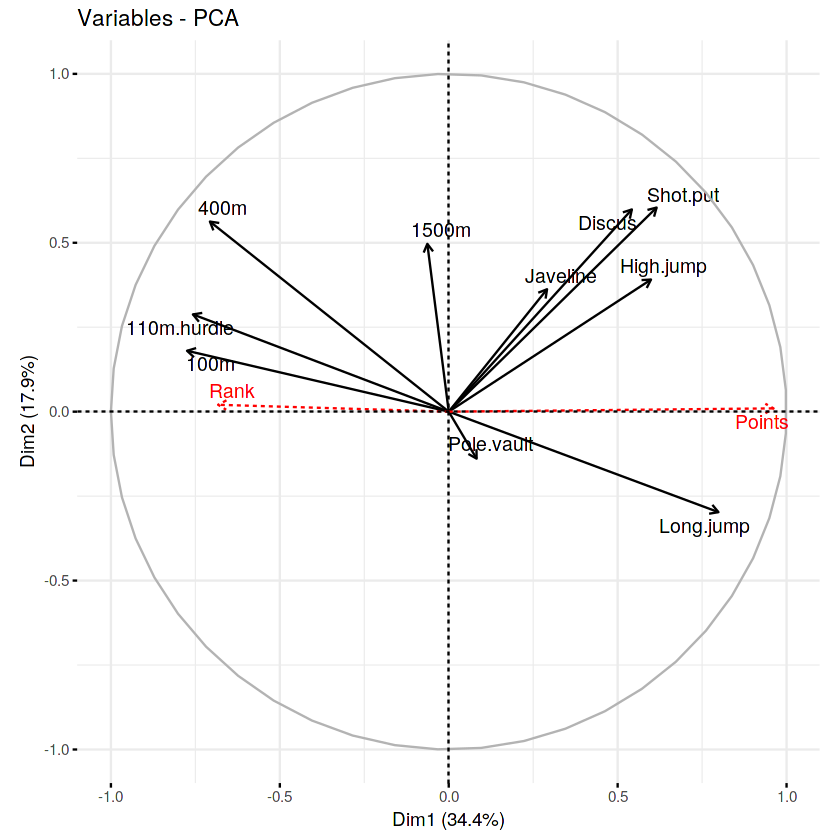

In [75]:
#Customised plot(colours changed)
fviz_pca_var(res.pca,
            col.var = "black",
            col.quanti.sup = "red", repel = TRUE)

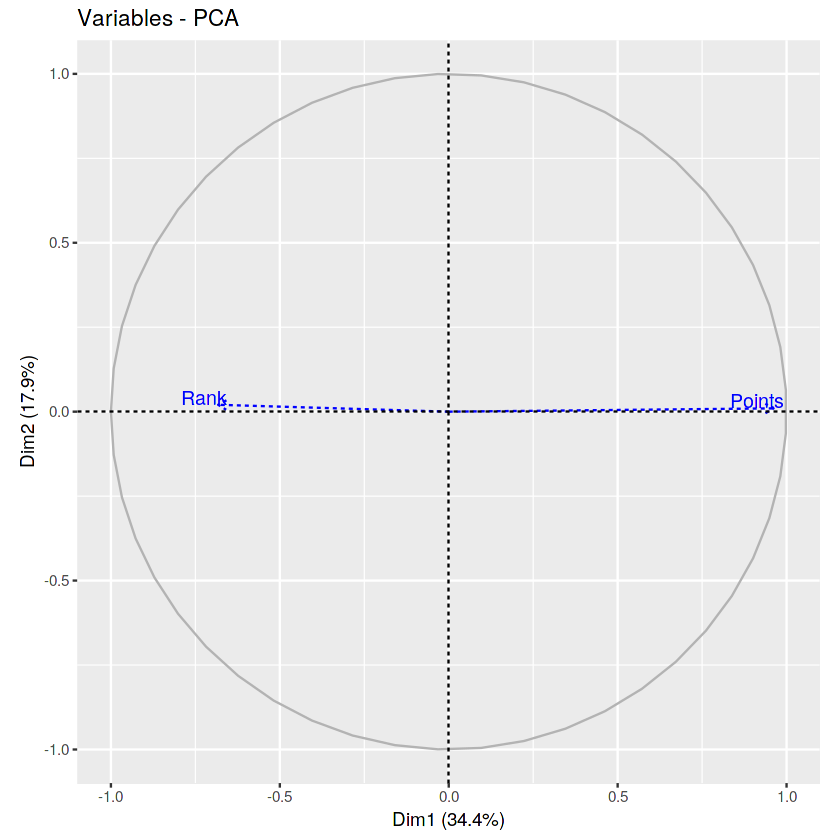

In [76]:
#show only supplementary variables
fviz_pca_var(res.pca, invisible = "var") 

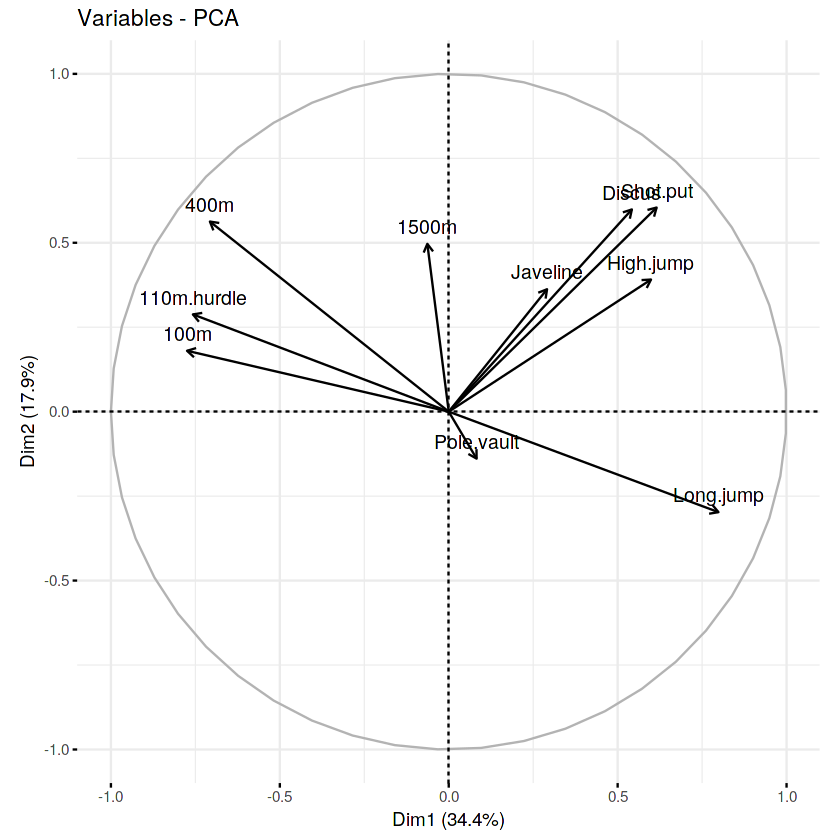

In [77]:
 #Hide supplementary variables
fviz_pca_var(res.pca, invisible = "quanti.sup") #Hide supplementary variables


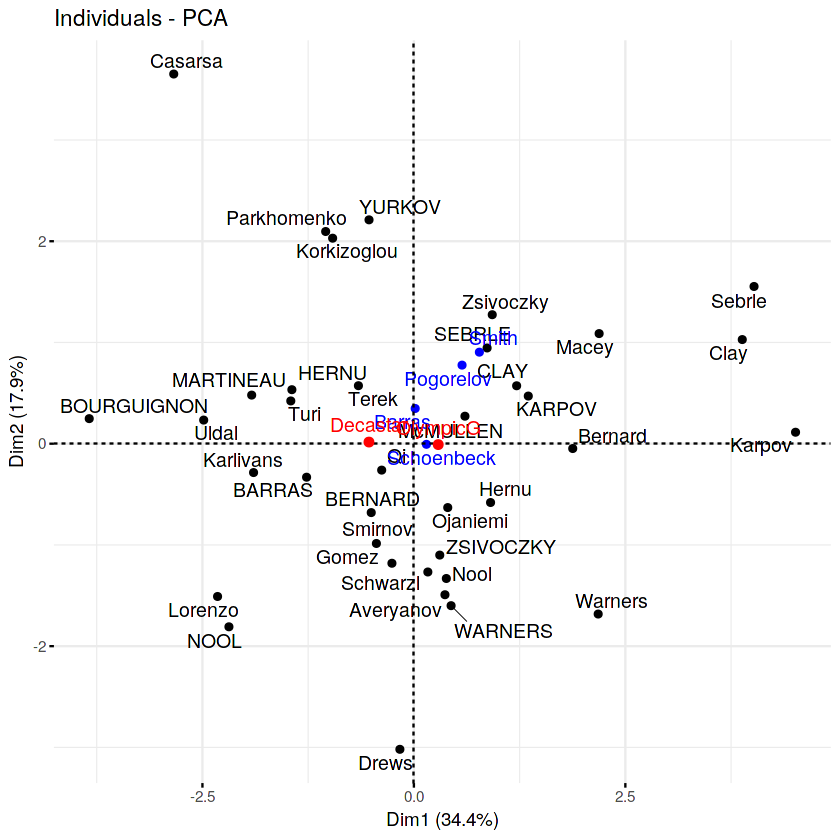

In [78]:
#Addition of individuals
p = fviz_pca_ind(res.pca, col.ind.sup = "blue", repel = TRUE)
p = fviz_add(p, res.pca$quali.sup$coord, color = "red")
p

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-0.5312636,0.016254790,0.2377816,-0.14498342,0.3103469
OlympicG,0.2877678,-0.008804678,-0.1287984,0.07853269,-0.1681046
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,0.3976579,0.000372265,0.07966104,0.02961599,0.1357014
OlympicG,0.3976579,0.000372265,0.07966104,0.02961599,0.1357014
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-1.26548,0.05358953,0.8974538,-0.6114844,1.66443
OlympicG,1.26548,-0.05358953,-0.8974538,0.6114844,-1.66443
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Competition,0.04448444,7.977326e-05,0.02237287,0.01038648,0.0769535


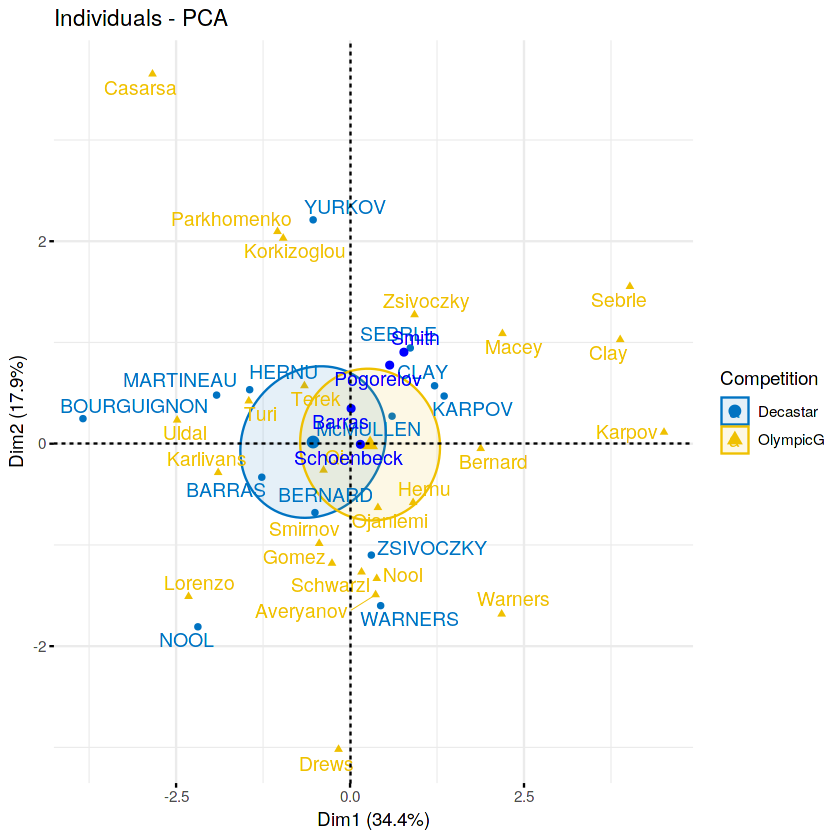

In [79]:
res.pca$quali
fviz_pca_ind(res.pca, habillage = 13,
            addEllipses = TRUE, ellipse.type = "confidence",
            palette = "jco", repel = TRUE)